In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

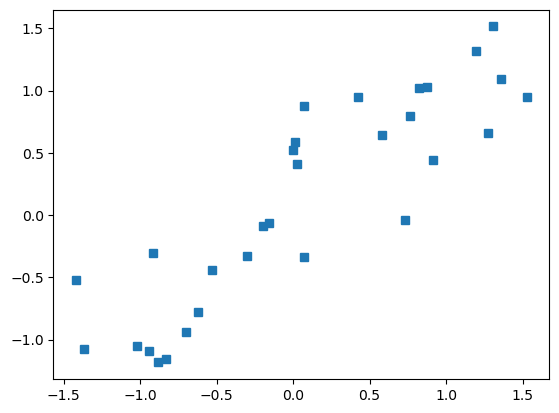

In [5]:
x = torch.randn(30,1)
y = x + torch.randn(30,1)/2

plt.plot(x,y,"s")
plt.show()

In [8]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
learning_rate = .05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learning_rate)

In [10]:
trainingEpochs = 500
losses = torch.zeros(trainingEpochs)

for epoch in range(trainingEpochs):

    yhat = ANNreg(x)
    loss = lossfun(yhat,y)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



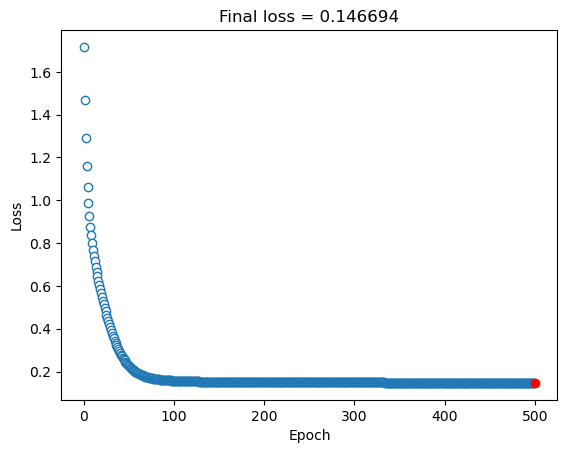

In [13]:
predictions = ANNreg(x)

testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(),"o",markerfacecolor="w",Linewidth=.1)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("Final Loss = %g" %testloss.item())
plt.show()